In [58]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
df = pd.read_csv('laptop.csv')
df.head()

,Unnamed: 0,Brand,Price,Features,ratings
0,0,Infinix INBook X1 Core i3 10th Gen - (8 GB/256...,"₹35,990₹49,99928% off",Intel Core i3 Processor (10th Gen)8 GB LPDDR4X...,4.3
1,1,Infinix INBook X1 Core i5 10th Gen - (8 GB/512...,"₹45,990₹59,99923% off",Intel Core i5 Processor (10th Gen)8 GB LPDDR4X...,4.1
2,2,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,"₹42,990₹50,99015% off",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,4.3
3,3,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,"₹44,490₹57,47922% off",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4.4
4,4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹59,990₹81,99026% off",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,4.5


In [61]:
df=df.drop(['Unnamed: 0'],axis=True)

In [62]:

df["Brand_name"]=df['Brand'].str.split(' ', expand=True)[0]
df['RAM(GB)'] = df["Features"].apply(lambda x: re.findall(r'(\d+)\sGB|\w+(\d+)\sGB',str(x))[0])

df['RAM(GB)'] = df["RAM(GB)"].apply(lambda x: re.findall(r'\d+|\w+',str(x))[0]) 


In [63]:
df["offer_Price"]=df["Price"].str.split("₹",expand=True)[2]
df["Price"]=df["Price"].str.split("₹",expand=True)[1]
df["Price"]=df["Price"].str.replace(",","")

In [64]:
mol=[]
for i in range(0,500):
    mol.append(" ".join(df['Brand'].str.split()[i][:3]))
df['Model']=mol


In [65]:
b= []
for i in df['Features']:
    d=(re.findall(r'\w+\s\w+\s(\w\d+)\sProcessor|Ryzen\s(\d+)\s',i))
    if d:
        b.append(d)
    else:
        b.append(np.nan)
df["Processor"]=b
df['Processor'] = df["Processor"].apply(lambda x: re.findall(r'\d+|\w+',str(x))[0])


In [66]:
b= []
for val in df['Brand']:
    if len(re.findall(r'(\d+)th|\d+rd',val))<1:
        b.append(np.nan)

    else:
        b.append(re.findall(r'(\d+)th|\d+rd',val)[0])
df["GEN"]=b


In [67]:
c= []
for i in df['Features']:
    c.append(re.findall(r'\(\d+.\d+\s\w+\)|\(\d+\s\w+\)',i))
df['Display(inchs)']=pd.Series(c).apply(lambda x:"".join(x))
df['Display(inchs)'] = df["Display(inchs)"].apply(lambda x: re.findall(r'\d+.\d+|\w+',str(x))[0]) 

In [68]:
f= []
for i in df['offer_Price']:
    b=(re.findall(r'(\d+\W\d+)\d\d%',str(i)))
    if b:
        f.append(b[0])
    else:
        f.append(np.nan)
        
df['Mrp']=f

df["Mrp"]=df["Mrp"].str.replace(",","")

In [69]:
g= []
for i in df['offer_Price']:
    b=(re.findall(r'(\d\d)%',str(i)))
    if b:
        g.append(b[0])
    else:
        g.append(np.nan)
        
df['Offer(%)']=g


In [70]:
k= []
for i in df['Brand']:
    b=(re.findall(r'GB/(\d+)\sGB|HDD/(\d+)\sGB',i))
    if b:
        k.append(b[0])
    else:
        k.append(np.nan)
df['Storage(SSD)']=k
df['Storage(SSD)'] = df["Storage(SSD)"].apply(lambda x: re.findall(r'\d+|\w+',str(x))[0])

In [71]:
a=df.drop(["Features","offer_Price","Brand"],axis=1)


In [72]:
new_data=a.rename(columns={"Brand_name":"Brand_Name","Offer(%)":"Discount(%)","GEN":"Generation","Mrp":"MRP(₹)","Price":"Offer_Price(₹)","Display(inchs)":"Display(inches)"})
new_data

,Offer_Price(₹),ratings,Brand_Name,RAM(GB),Model,Processor,Generation,Display(inches),MRP(₹),Discount(%),Storage(SSD)
0,35990,4.3,Infinix,8,Infinix INBook X1,i3,10,14,49999,28,256
1,45990,4.1,Infinix,8,Infinix INBook X1,i5,10,14,59999,23,512
2,42990,4.3,ASUS,8,ASUS VivoBook 15,i3,10,15.6,50990,15,512
3,44490,4.4,DELL,8,DELL Inspiron Core,i3,11,15.6,57479,22,256
4,59990,4.5,ASUS,8,ASUS TUF Gaming,i5,10,15.6,81990,26,512
...,...,...,...,...,...,...,...,...,...,...,...
495,35990,5.0,Infinix,8,Infinix INBook X1,i3,10,14,49999,28,256
496,111990,4.4,ASUS,8,ASUS Zephyrus G14,7,5,14,37990,18,nan
497,111999,5.0,HP,16,HP Spectre x360,i5,11,13.5,46194,23,512
498,65890,5.0,DELL,8,DELL Inspiron Core,i5,11,15.6,86840,24,512


In [73]:
new_data.isnull().sum()

Offer_Price(₹)       0
ratings              0
Brand_Name           0
RAM(GB)              0
Model                0
Processor            0
Generation         113
Display(inches)      0
MRP(₹)              15
Discount(%)         15
Storage(SSD)         0
dtype: int64

In [74]:
new_data["Storage(SSD)"].unique()

array(['256', '512', 'nan', '128', '64'], dtype=object)

In [75]:
new = []
for i in new_data["Storage(SSD)"]:
    if i == "nan":
        new.append('512')
    else:
        new.append(i)
        new_data["Storage(SSD)"].mode()
new_data["Storage(SSD)"] = new    

In [76]:

new_data['Generation'] = new_data['Generation'].fillna(0)
new_data['Discount(%)'] = new_data['Discount(%)'].fillna(0)
new_data['MRP(₹)'] = new_data['MRP(₹)'].fillna(0)

In [77]:
new = []
for i in new_data["Generation"]:
    if i == 0 or i=="":
        new.append('11')
    else:
        new.append(i)
        new_data["Generation"].mode()
new_data["Generation"] = new 


In [78]:
new_data['Generation'].unique()

array(['10', '11', '9', '4', '8', '7', '5'], dtype=object)

In [79]:
new_data.isnull().sum()

Offer_Price(₹)     0
ratings            0
Brand_Name         0
RAM(GB)            0
Model              0
Processor          0
Generation         0
Display(inches)    0
MRP(₹)             0
Discount(%)        0
Storage(SSD)       0
dtype: int64

In [80]:
new_data

,Offer_Price(₹),ratings,Brand_Name,RAM(GB),Model,Processor,Generation,Display(inches),MRP(₹),Discount(%),Storage(SSD)
0,35990,4.3,Infinix,8,Infinix INBook X1,i3,10,14,49999,28,256
1,45990,4.1,Infinix,8,Infinix INBook X1,i5,10,14,59999,23,512
2,42990,4.3,ASUS,8,ASUS VivoBook 15,i3,10,15.6,50990,15,512
3,44490,4.4,DELL,8,DELL Inspiron Core,i3,11,15.6,57479,22,256
4,59990,4.5,ASUS,8,ASUS TUF Gaming,i5,10,15.6,81990,26,512
...,...,...,...,...,...,...,...,...,...,...,...
495,35990,5.0,Infinix,8,Infinix INBook X1,i3,10,14,49999,28,256
496,111990,4.4,ASUS,8,ASUS Zephyrus G14,7,5,14,37990,18,512
497,111999,5.0,HP,16,HP Spectre x360,i5,11,13.5,46194,23,512
498,65890,5.0,DELL,8,DELL Inspiron Core,i5,11,15.6,86840,24,512


## Type Casting

In [81]:
new_data['Offer_Price(₹)'] = new_data['Offer_Price(₹)'].astype('int')
new_data['MRP(₹)'] = new_data['MRP(₹)'].astype('int')
new_data['Display(inches)'] = new_data['Display(inches)'].astype('float')
new_data['RAM(GB)'] = new_data['RAM(GB)'].astype('int')
new_data['Discount(%)'] = new_data['Discount(%)'].astype('int')
new_data['Storage(SSD)'] = new_data['Storage(SSD)'].astype('int')
new_data['Generation'] = new_data['Generation'].astype('int')

In [82]:
new_data['MRP(₹)']=new_data['MRP(₹)'].replace(0,new_data['MRP(₹)'].mean())

In [83]:
new_data['Discount(%)']=new_data['Discount(%)'].replace(0,new_data['Discount(%)'].mean())

In [84]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Offer_Price(₹)   500 non-null    int32  
 1   ratings          500 non-null    float64
 2   Brand_Name       500 non-null    object 
 3   RAM(GB)          500 non-null    int32  
 4   Model            500 non-null    object 
 5   Processor        500 non-null    object 
 6   Generation       500 non-null    int32  
 7   Display(inches)  500 non-null    float64
 8   MRP(₹)           500 non-null    float64
 9   Discount(%)      500 non-null    float64
 10  Storage(SSD)     500 non-null    int32  
dtypes: float64(4), int32(4), object(3)
memory usage: 35.3+ KB


In [85]:
df1=new_data[["Model","Brand_Name","Processor","Generation","RAM(GB)","Storage(SSD)","Display(inches)","MRP(₹)","Discount(%)","Offer_Price(₹)"]]

In [86]:
df1.describe()

,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,10.564000,9.508000,424.704000,14.662400,52980.754780,23.762100,69027.312000
std,0.799489,4.105563,127.026422,0.931442,26998.770157,12.759348,39073.827894
min,4.000000,2.000000,64.000000,11.600000,168.000000,2.000000,21490.000000
25%,10.000000,8.000000,256.000000,14.000000,40365.000000,17.000000,44967.500000
50%,11.000000,8.000000,512.000000,14.000000,56999.000000,23.000000,57990.000000
75%,11.000000,8.000000,512.000000,15.600000,69999.000000,28.000000,77990.000000
max,11.000000,32.000000,512.000000,17.300000,99999.000000,99.000000,345390.000000


In [33]:
df1["Website"]="flipkart"

,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹),Website
0,Infinix INBook X1,Infinix,i3,10,8,256,14.0,49999.0,28.0,35990,flipkart
1,Infinix INBook X1,Infinix,i5,10,8,512,14.0,59999.0,23.0,45990,flipkart
2,ASUS VivoBook 15,ASUS,i3,10,8,512,15.6,50990.0,15.0,42990,flipkart
3,DELL Inspiron Core,DELL,i3,11,8,256,15.6,57479.0,22.0,44490,flipkart
4,ASUS TUF Gaming,ASUS,i5,10,8,512,15.6,81990.0,26.0,59990,flipkart
...,...,...,...,...,...,...,...,...,...,...,...
495,Infinix INBook X1,Infinix,i3,10,8,256,14.0,49999.0,28.0,35990,flipkart
496,ASUS Zephyrus G14,ASUS,7,5,8,512,14.0,37990.0,18.0,111990,flipkart
497,HP Spectre x360,HP,i5,11,16,512,13.5,46194.0,23.0,111999,flipkart
498,DELL Inspiron Core,DELL,i5,11,8,512,15.6,86840.0,24.0,65890,flipkart


In [38]:
df1=df1[["Website","Model","Brand_Name","Processor","Generation","RAM(GB)","Storage(SSD)","Display(inches)","MRP(₹)","Discount(%)","Offer_Price(₹)"]]

In [39]:
df1

,Website,Model,Brand_Name,Processor,Generation,RAM(GB),Storage(SSD),Display(inches),MRP(₹),Discount(%),Offer_Price(₹)
0,flipkart,Infinix INBook X1,Infinix,i3,10,8,256,14.0,49999.0,28.0,35990
1,flipkart,Infinix INBook X1,Infinix,i5,10,8,512,14.0,59999.0,23.0,45990
2,flipkart,ASUS VivoBook 15,ASUS,i3,10,8,512,15.6,50990.0,15.0,42990
3,flipkart,DELL Inspiron Core,DELL,i3,11,8,256,15.6,57479.0,22.0,44490
4,flipkart,ASUS TUF Gaming,ASUS,i5,10,8,512,15.6,81990.0,26.0,59990
...,...,...,...,...,...,...,...,...,...,...,...
495,flipkart,Infinix INBook X1,Infinix,i3,10,8,256,14.0,49999.0,28.0,35990
496,flipkart,ASUS Zephyrus G14,ASUS,7,5,8,512,14.0,37990.0,18.0,111990
497,flipkart,HP Spectre x360,HP,i5,11,16,512,13.5,46194.0,23.0,111999
498,flipkart,DELL Inspiron Core,DELL,i5,11,8,512,15.6,86840.0,24.0,65890


In [54]:
df1.to_csv('laptops1.csv')
data = pd.read_csv("C:\\Users\\rohitha\\laptops1.csv")
data1=data.drop("Unnamed: 0",axis=1)

<AxesSubplot:xlabel='Discount(%)', ylabel='Density'>

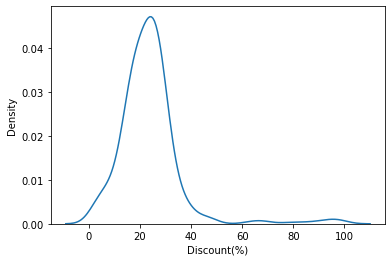

In [55]:
sns.kdeplot(data1['Discount(%)'])

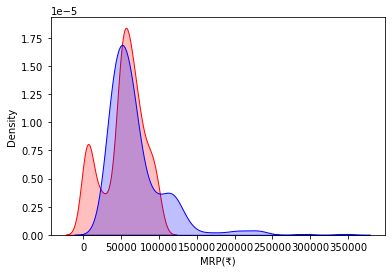

In [57]:
fig = sns.kdeplot(data['MRP(₹)'], shade=True, color="r")
fig = sns.kdeplot(data['Offer_Price(₹)'], shade=True, color="b")
plt.show()